# Example No 2 : CNN model by Keras for MNIST dataset (Acc 0.997)

# Table of Content 
- [1 - Introduction ](#intro)
    - [1.1 What is the new we will learn in this example ? ](#new_learn)
    - [1.2 The source of the data ](#data_source)
    - [1.3 The strategy followed in this model ](#strategy)
    
    - [1.4 Load the required libraries ](#import)


- [2 - Data preparation ](#preparation)
    - [ 2.1 Load data ](#load_data)

    - [ 2.2 Check for null and missing values ](#check_null)
    - [ 2.3 Normalization ](#normalization)
    - [ 2.4 Reshape ](#reshape)
    - [ 2.5 Label encoding ](#label_encoding)
    - [ 2.6 Split training and validation set](#split_data)

- [3- Build CNN model ](#CNN_model)
    - [ 3.1 Define our CNN model ](#define_model)
    
    - [ 3.2 Set the optimizer and annealer](#optimizer)
    - [ 3.3 Data augmentation ](#augmentation)

    
- [4- Train & Evaluate the model](#train_evaluate)
    - [ 4.1 Train (Fit) our CNN Model ](#train_model)
    
    - [ 4.2 Training and validation curves ](#curves)
    - [ 4.3 Confusion matrix](#confusion_matrix)


- [5- Prediction ](#prediction)
    <!-- - [5.1 Model performance for each category  ](#model_performance) -->

-  [ Further TensorFlow (Keras) Applications for CNN ](#other_apps)

-  [ Key Resources Utilized in Crafting This Notebook](#resources)





<a name="intro"></a>
## 1 - Introduction

<a name="new_learn"></a>
### 1.1 What is the new we will learn in this example ?
* We will construct a CNN using Keras for the MNIST dataset. 
* Specifically, this example will emphasize data preparation and demonstrate its impact on the final model performance to achieve more than 99 % accuracy. 

<a name="data_source"></a>
### 1.2 The source of the data 
The original code of this example and the data from Kaggle and you can download; [Introduction to CNN Keras - Acc 0.997 (top 8%)](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6), by **Yassine Ghouzam, PhD**  on 18/07/2017

<a name="strategy"></a>
### 1.3 The strategy followed in this model 
The strategy he followed in this tutorial could be summarized as :  

* He will begin by preparing the data, which consists of handwritten digit images, and then shift his focus to CNN modeling and evaluation.
* He achieved 99.671% of accuracy with this CNN trained in 2h30 on a single CPU (i5 2500k). For those who have a >= 3.0 GPU capabilites (from GTX 650 - to recent GPUs), you can use tensorflow-gpu with keras. Computation will be much much faster !!!

* **For computational reasons, i set the number of steps (epochs) to 2, if you want to achieve 99+% of accuracy set it to 30.**

* This Notebook follows three main parts:

    * The data preparation
    * The CNN modeling and evaluation
    * The results prediction and submission

<a name="import"></a>
### 1.4 Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

<a name="preparation"></a>
## 2 - Data preparation 

<a name="load_data"></a>
### 2.1 Load Data


In [2]:
# Load the data
train = pd.read_csv("Digit_Recognition_Mnist/train.csv")
test = pd.read_csv("Digit_Recognition_Mnist/test.csv")

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

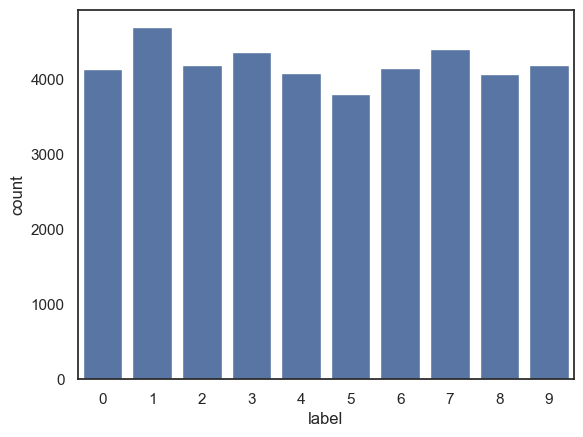

In [4]:
# Create a count plot
sns.countplot(x='label', data=train)
# sns.countplot(Y_train) # this another option but it consume huge memory maybe because it deal with series rather than dataframe 

We have similar counts for the 10 digits.

<a name="check_null"></a>
### 2.2 Check for null and missing values

In [5]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.

<a name="normalization"></a>
### 2.3 Normalization

We perform a grayscale normalization to reduce the effect of illumination's differences. 

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

<a name="reshape"></a>
### 2.3 Reshape

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices. 

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices. 

<a name="label_encoding"></a>
### 2.5 Label encoding

In [9]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

<a name="split_data"></a>
### 2.6 Split training and validation set  

In [10]:
# Set the random seed
random_seed = 2

In [11]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation. 

To avoid that, you could use stratify = True option in train_test_split function (**Only for >=0.17 sklearn versions**).

We can get a better sense for one of these examples by visualising the image and looking at the label.

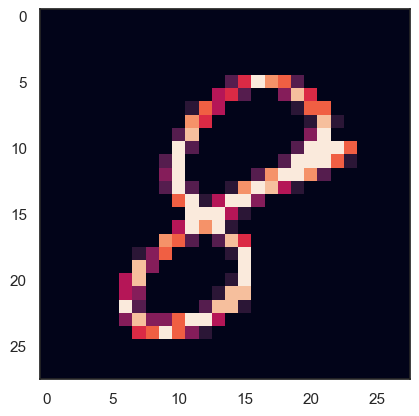

In [12]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

<a name="CNN_model"></a>
# 3- Build CNN model


<a name="define_model"></a>
### 3.1 Define our CNN model

* Sequential API Usage: The Keras Sequential API is employed, where layers are added one at a time, starting from the input.
* Convolutional (Conv2D) Layer: This functions as a set of learnable filters. For the first two Conv2D layers, 32 filters are set, and for the last two, 64 filters. Each filter transforms a part of the image defined by the kernel size. The kernel filter matrix is applied to the entire image, treating filters as transformations.
* Pooling (MaxPool2D) Layer: This layer acts as a downsampling filter by selecting the maximal value from neighboring pixels. It helps reduce computational cost and to some extent, overfitting. The pooling size is chosen, affecting the downsampling.
* Features Isolation: CNN can isolate useful features from transformed images (feature maps), combining local and global features through convolutional and pooling layers.
* Dropout Regularization: A regularization method where a proportion of nodes in the layer are randomly ignored for each training sample. This technique improves generalization and reduces overfitting.
* Rectifier Activation (relu): The rectifier activation function (max(0,x)) adds non-linearity to the network.
* Flatten Layer: Used to convert final feature maps into a 1D vector, necessary for fully connected layers after convolutional/maxpool layers. This step combines all found local features.
* Fully-Connected (Dense) Layers: The features are utilized in two Dense layers, resembling an artificial neural network (ANN) classifier. The last layer (Dense(10, activation="softmax")) outputs the probability distribution of each class.
* In the end, he employed the features in two fully-connected (Dense) layers, creating an artificial neural network (ANN) classifier. The last layer (Dense(10, activation="softmax")) outputs the probability distribution of each class.

In [13]:
# Set the CNN model 
# my CNN architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a name="optimizer"></a>
### 3.2 Set the optimizer and annealer


* Layer Addition: After adding layers to the model, the next steps involve setting up a score function, a loss function, and an optimization algorithm.

* Loss Function Definition: The loss function is defined to measure the model's performance on images with known labels. It quantifies the error rate between observed and predicted labels. For categorical classifications (>2 classes), a specific form called "categorical_crossentropy" is used.
* Optimizer Function: The optimizer function is crucial as it iteratively improves parameters (filter kernel values, weights, and neuron biases) to minimize the loss. The chosen optimizer is RMSprop with default values, known for its effectiveness. RMSProp adjusts the Adagrad method to mitigate its aggressive, monotonically decreasing learning rate. Alternatively, Stochastic Gradient Descent ('sgd') could be used, but it is slower than RMSprop.
* Metric Function (Accuracy): The metric function "accuracy" is employed to evaluate the model's performance. Unlike the loss function, the metric evaluation results are not used during the model training; they are only used for evaluation purposes.
* In the end, he adds layers to the model and proceeds to set up a score function, a loss function (categorical_crossentropy), and an optimization algorithm (RMSprop). The metric function "accuracy" is used for evaluating the model's performance.

In [14]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [15]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function. 

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [16]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

<a name="augmentation"></a>
### 3.3 Data Augmentation

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered 
The scale is not the same (some who write with big/small numbers)
The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. 

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

The improvement is important : 
   - Without data augmentation i obtained an accuracy of 98.114%
   - With data augmentation i achieved 99.67% of accuracy

In [6]:
# Without data augmentation i obtained an accuracy of 0.98114
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
#          validation_data = (X_val, Y_val), verbose = 2)

In [18]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

For the data augmentation, i choosed to :
   - Randomly rotate some training images by 10 degrees
   - Randomly  Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height
   
I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

<a name="train_evaluate"></a>
## 4. Train & Evaluate the model

<a name="train_model"></a>
### 4.1 Train (Fit) our CNN Model

In [19]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
439/439 - 42s - loss: 0.4075 - accuracy: 0.8704 - val_loss: 0.0704 - val_accuracy: 0.9771 - lr: 0.0010 - 42s/epoch - 95ms/step
Epoch 2/30
439/439 - 42s - loss: 0.1224 - accuracy: 0.9640 - val_loss: 0.0485 - val_accuracy: 0.9845 - lr: 0.0010 - 42s/epoch - 95ms/step
Epoch 3/30
439/439 - 39s - loss: 0.0919 - accuracy: 0.9726 - val_loss: 0.0322 - val_accuracy: 0.9910 - lr: 0.0010 - 39s/epoch - 90ms/step
Epoch 4/30
439/439 - 36s - loss: 0.0784 - accuracy: 0.9769 - val_loss: 0.0546 - val_accuracy: 0.9845 - lr: 0.0010 - 36s/epoch - 82ms/step
Epoch 5/30
439/439 - 36s - loss: 0.0697 - accuracy: 0.9788 - val_loss: 0.0442 - val_accuracy: 0.9869 - lr: 0.0010 - 36s/epoch - 82ms/step
Epoch 6/30
439/439 - 35s - loss: 0.0655 - accuracy: 0.9810 - val_loss: 0.0290 - val_accuracy: 0.9921 - lr: 0.0010 - 35s/epoch - 81ms/step
Epoch 7/30
439/439 - 35s - loss: 0.0624 - accuracy: 0.9819 - val_loss: 0.0319 - val_accuracy: 0.9924 - lr: 0.0010 - 35s/epoch - 80ms/step
Epoch 8/30
439/439 - 36s - loss: 0


<a name="curves"></a>
### 4.2 Training and validation curves

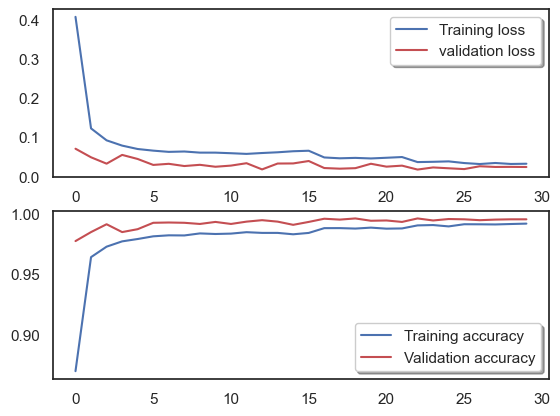

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

The model reaches almost 99% (98.7+%) accuracy on the validation dataset after 2 epochs. The validation accuracy is greater than the training accuracy almost every time during the training. That means that our model doesn't overfit the training set.

Our model is very well trained  !!! 


<a name="confusion_matrix"></a>
## 4.3 Confusion matrix

Confusion matrix can be very helpfull to see your model drawbacks.

I plot the confusion matrix of the validation results.

132/132 [==============================] - 1s 9ms/step


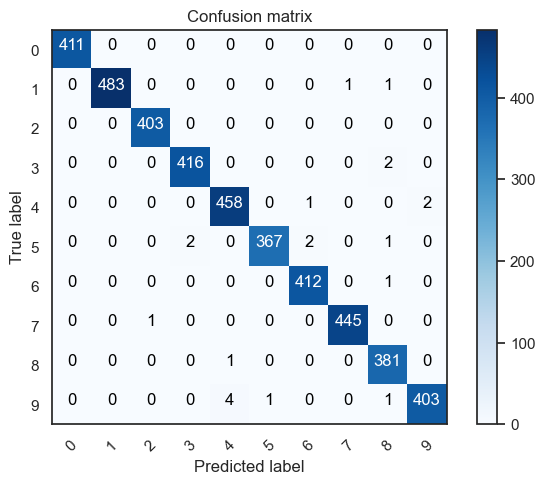

In [21]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

Here we can see that our CNN performs very well on all digits with few errors considering the size of the validation set (4 200 images).

However, it seems that our CNN has some little troubles with the 4 digits, hey are misclassified as 9. Sometime it is very difficult to catch the difference between 4 and 9 when curves are smooth.

<a name="prediction"></a>
## 5- Prediction

Let's investigate for errors. 

I want to see the most important errors . For that purpose i need to get the difference between the probabilities of real value and the predicted ones in the results.

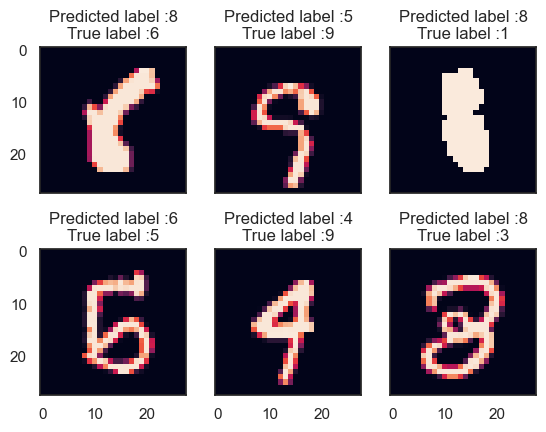

In [22]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

The most important errors are also the most intrigous. 

For those six case, the model is not ridiculous. Some of these errors can also be made by humans, especially for one the 9 that is very close to a 4. The last 9 is also very misleading, it seems for me that is a 0.

In [24]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")


875/875 [==============================] - 8s 9ms/step


&nbsp;

<a name="other_apps"></a>
## Further TensorFlow (Keras) Applications for CNN 
---------
* [The basic tools of Keras for CNN](../2_Keras_BasicTools_CNN.ipynb)
* [Example No 1](Example_No_1_images_6categories.ipynb) : 6 Categories Images Classification.

* [Example No 3](Example_No_3_fashion_related_dataset.ipynb) : fashion-related dataset. 

* [Example No 4](Example_No_4_cats_dogs_classification.ipynb) : Cats & Dogs Classification. 

* [Example No 5](Example_No_5_Cats_Dogs_classifer.ipynb) : Cats & Dogs classifier and compare to the DNN model. 

&nbsp;
<a name="resources"></a>
## Key Resources Utilized in Crafting This Notebook :
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem/CNN"> Hesham Asem GitHub for ML tools. </a>